## Plotting RF waveforms for open source RF Journal

In [1]:
import itertools as it
# import posixpath
import sys
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data
import torch.utils.data as data
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import glob
import json
from os import walk
import pickle
import json
import pathlib
import random
from timeit import default_timer as timer
import time
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
global GPU, fft, Fs, center_freq, fft_val, Fs_test, loss, batches, eps, var_noise, mean_noise, top
global c1_coeff, c2_coeff, a, r1_c1, r2_c1, r1_c2, r2_c2, compare
a = 1
compare = .5
r1_c2 = 1
r2_c2 = 20e0
top = .975
var_noise = 8.78e-09
# mean_noise = 10 # worked pretty good
mean_noise = 1
eps = 1e-15
Fs = 1000000
fft = 1024
center_freq_file = 433.65e6 # when SDR doing 25MSPS with center at 428MHz
center_freq_live = 428.00e6 # when SDR doing 25MSPS with center at 428MHz
# batches = 128
plt.style.use('default')
GPU = 1
cuda = "cuda:1"
device = torch.device(cuda)
print('Torch version =', torch.__version__, 'CUDA version =', torch.version.cuda)
print('CUDA Device:', device)
print('Is cuda available? =',torch.cuda.is_available())

Torch version = 1.6.0 CUDA version = 10.2
CUDA Device: cuda:1
Is cuda available? = True


In [2]:
#%matplotlib notebook
# %matplotlib inline

In [4]:
def gpu_test_file(db,msps): 
    if (msps == 1):
        w1 = fft*msps
    elif (msps == 5):
        w1 = fft*msps
    elif (msps == 10):
        w1 = fft*msps
    elif (msps == 25):
        w1 = fft*msps
    I = db[0::2]
    Q = db[1::2]
    w = fft*msps
    den = 2
    win = torch.hamming_window(w1, periodic=True, dtype=None, layout=torch.strided, requires_grad=False).cuda(GPU)
    I_stft = torch.stft(torch.tensor(I).cuda(GPU), n_fft=w, hop_length=w//den, win_length=w1, window=win, center=True, normalized=True, onesided=False)
    Q_stft = torch.stft(torch.tensor(Q).cuda(GPU), n_fft=w, hop_length=w//den, win_length=w1, window=win, center=True, normalized=True, onesided=False)
    X_stft = I_stft[...,0] + Q_stft[...,0] + I_stft[...,1] + -1*Q_stft[...,1]
    Z_stft = torch.cat((I_stft,Q_stft),2)
    Z_stft = Z_stft[:w//2,:,:] # throw bottom 1/2 away
    torch.cuda.empty_cache()
    return Z_stft # Returning 4D

#### Machine paths

In [5]:
path_lora125 = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/lora125/" # ACE
path_lora250 = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/lora250/" # ACE
path_click = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/click/" # ACE
path_gd55 = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/gd55/" # ACE
path_light = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/light/" # ACE
path_nfm = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/nfm/" # ACE
path_sado = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/sado/" # ACE
path_tyt = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/tyt/" # ACE
path_vod = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/vod/" # ACE
path_ysf = "/home/david/sigMF_ML/RF/RF_class/testing_data_1msps/ysf/" # ACE
path_plots = "/home/david/sigMF_ML/RF/RF_class/waveform_plots/"

#### LoRa 125 kHz

In [5]:
os.chdir(path_lora125)
lora125 = np.fromfile("lora125_test1.sigmf-data", dtype="float32")

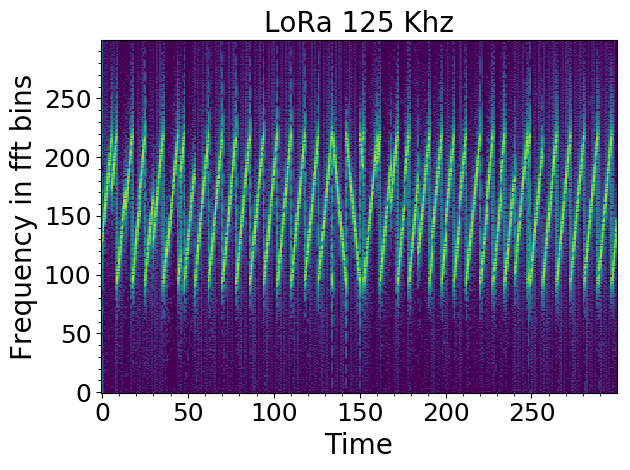

In [116]:
# db = np.fromfile(db, dtype="float32")
msps = 1
stft = gpu_test_file(lora125,msps)
X_stft = stft[...,0] + stft[...,1] + stft[...,2] - stft[...,3]
stft_plot = 20*np.log10(np.abs(X_stft.detach().cpu().numpy()+eps))
fig1 = plt.figure()
plt.imshow(stft_plot[200:500,0:300], vmin=-70, vmax=5, aspect='auto', origin='lower')
plt.title('LoRa 125 Khz', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Frequency in fft bins', fontsize=20)
plt.minorticks_on()
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.tight_layout()
os.chdir(path_plots)
fig1.savefig('lora125.pdf', format="pdf")
plt.show()

#### LoRa 250 kHz

In [35]:
os.chdir(path_lora250)
lora250 = np.fromfile("lora250_test1.sigmf-data", dtype="float32")

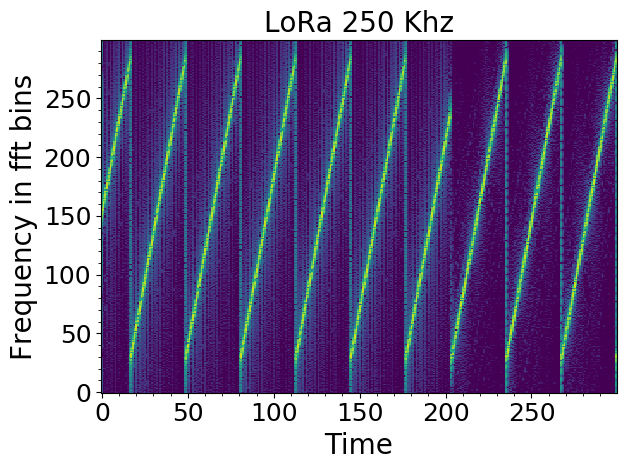

In [48]:
# db = np.fromfile(db, dtype="float32")
msps = 1
stft = gpu_test_file(lora250,msps)
X_stft = stft[...,0] + stft[...,1] + stft[...,2] - stft[...,3]
stft_plot = 20*np.log10(np.abs(X_stft.detach().cpu().numpy()+eps))
fig1 = plt.figure()
plt.imshow(stft_plot[200:500,0:300], vmin=-70, vmax=5, aspect='auto', origin='lower')
# plt.imshow(stft_plot, vmin=-70, vmax=5, aspect='auto', origin='lower')
plt.title('LoRa 250 Khz', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Frequency in fft bins', fontsize=20)
plt.minorticks_on()
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.tight_layout()
os.chdir(path_plots)
fig1.savefig('lora250.pdf', format="pdf")
plt.show()

#### click

In [107]:
os.chdir(path_click)
click = np.fromfile("click_fob1_60dBm_test1.sigmf-data", dtype="float32")

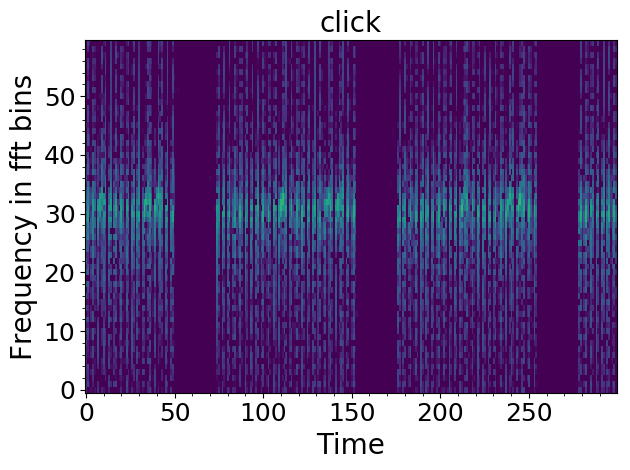

In [115]:
# db = np.fromfile(db, dtype="float32")
msps = 1
stft = gpu_test_file(click,msps)
X_stft = stft[...,0] + stft[...,1] + stft[...,2] - stft[...,3]
stft_plot = 20*np.log10(np.abs(X_stft.detach().cpu().numpy()+eps))
fig1 = plt.figure()
plt.imshow(stft_plot[190:250,0:300], vmin=-70, vmax=5, aspect='auto', origin='lower')
# plt.imshow(stft_plot, vmin=-70, vmax=5, aspect='auto', origin='lower')
plt.title('click', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Frequency in fft bins', fontsize=20)
plt.minorticks_on()
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.tight_layout()
os.chdir(path_plots)
fig1.savefig('click.pdf', format="pdf")
plt.show()

#### gd55

In [57]:
os.chdir(path_gd55)
gd55 = np.fromfile("GD55_DMR_60dBm_test1.sigmf-data", dtype="float32")

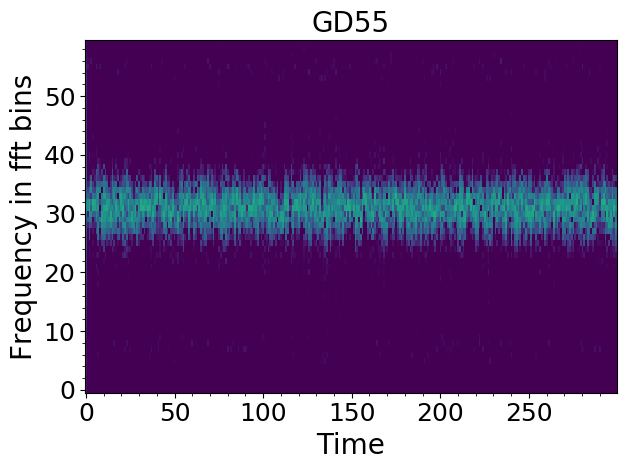

In [104]:
# db = np.fromfile(db, dtype="float32")
msps = 1
stft = gpu_test_file(gd55,msps)
X_stft = stft[...,0] + stft[...,1] + stft[...,2] - stft[...,3]
stft_plot = 20*np.log10(np.abs(X_stft.detach().cpu().numpy()+eps))
fig1 = plt.figure()
plt.imshow(stft_plot[225:285,0:300], vmin=-70, vmax=5, aspect='auto', origin='lower')
# plt.imshow(stft_plot, vmin=-70, vmax=5, aspect='auto', origin='lower')
plt.title('GD55', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Frequency in fft bins', fontsize=20)
plt.minorticks_on()
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.tight_layout()
os.chdir(path_plots)
fig1.savefig('gd55.pdf', format="pdf")
plt.show()

#### NFM

In [66]:
os.chdir(path_nfm)
NFM = np.fromfile("UHF_NFM_VX8_music2_test1.sigmf-data", dtype="float32")

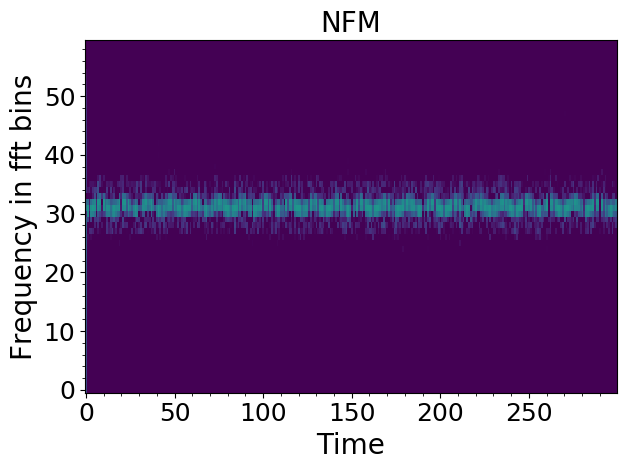

In [100]:
# db = np.fromfile(db, dtype="float32")
msps = 1
stft = gpu_test_file(NFM,msps)
X_stft = stft[...,0] + stft[...,1] + stft[...,2] - stft[...,3]
stft_plot = 20*np.log10(np.abs(X_stft.detach().cpu().numpy()+eps))
fig1 = plt.figure()
plt.imshow(stft_plot[225:285,0:300], vmin=-70, vmax=5, aspect='auto', origin='lower')
# plt.imshow(stft_plot, vmin=-70, vmax=5, aspect='auto', origin='lower')
plt.title('NFM', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Frequency in fft bins', fontsize=20)
plt.minorticks_on()
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.tight_layout()
os.chdir(path_plots)
fig1.savefig('nfm.pdf', format="pdf")
plt.show()

#### Light

In [70]:
os.chdir(path_light)
light = np.fromfile("sw1_915_test1_on.sigmf-data", dtype="float32")

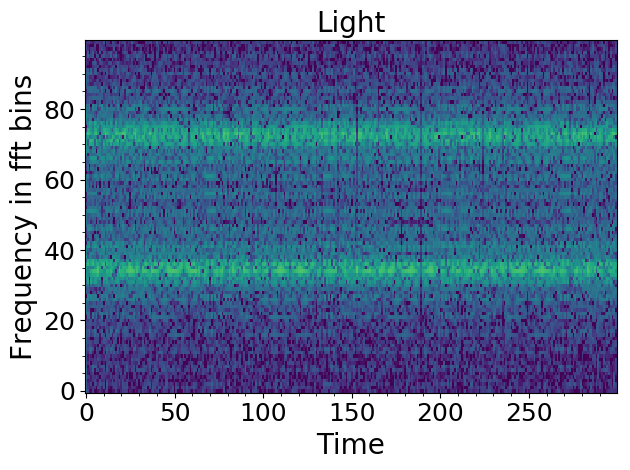

In [75]:
# db = np.fromfile(db, dtype="float32")
msps = 1
stft = gpu_test_file(light,msps)
X_stft = stft[...,0] + stft[...,1] + stft[...,2] - stft[...,3]
stft_plot = 20*np.log10(np.abs(X_stft.detach().cpu().numpy()+eps))
fig1 = plt.figure()
plt.imshow(stft_plot[300:400,0:300], vmin=-70, vmax=5, aspect='auto', origin='lower')
# plt.imshow(stft_plot, vmin=-70, vmax=5, aspect='auto', origin='lower')
plt.title('Light', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Frequency in fft bins', fontsize=20)
plt.minorticks_on()
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.tight_layout()
os.chdir(path_plots)
fig1.savefig('light.pdf', format="pdf")
plt.show()

#### Sado

In [76]:
os.chdir(path_sado)
sado = np.fromfile("sado_db1_60dBm_test1.sigmf-data", dtype="float32")

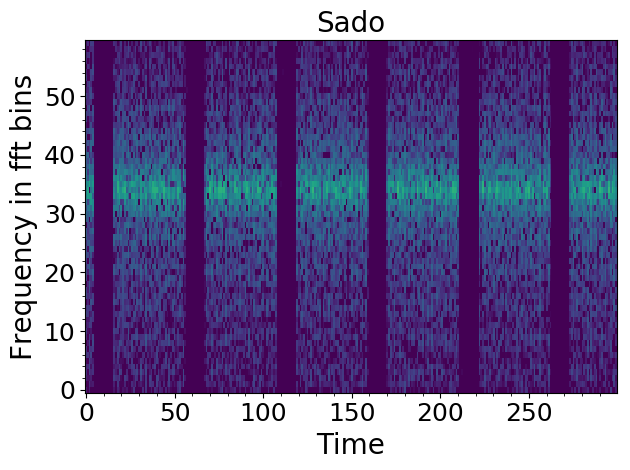

In [103]:
# db = np.fromfile(db, dtype="float32")
msps = 1
stft = gpu_test_file(sado,msps)
X_stft = stft[...,0] + stft[...,1] + stft[...,2] - stft[...,3]
stft_plot = 20*np.log10(np.abs(X_stft.detach().cpu().numpy()+eps))
fig1 = plt.figure()
plt.imshow(stft_plot[190:250,0:300], vmin=-70, vmax=5, aspect='auto', origin='lower')
# plt.imshow(stft_plot, vmin=-70, vmax=5, aspect='auto', origin='lower')
plt.title('Sado', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Frequency in fft bins', fontsize=20)
plt.minorticks_on()
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.tight_layout()
os.chdir(path_plots)
fig1.savefig('sado.pdf', format="pdf")
plt.show()

#### TYT

In [81]:
os.chdir(path_tyt)
tyt = np.fromfile("UHF_TYT_DMR_voice2_test1.sigmf-data", dtype="float32")

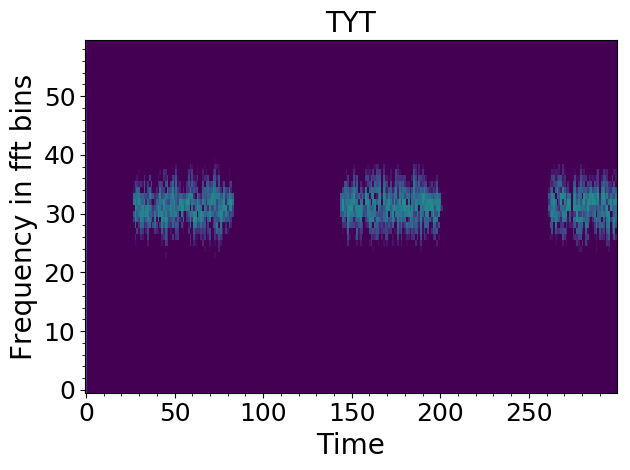

In [99]:
# db = np.fromfile(db, dtype="float32")
msps = 1
stft = gpu_test_file(tyt,msps)
X_stft = stft[...,0] + stft[...,1] + stft[...,2] - stft[...,3]
stft_plot = 20*np.log10(np.abs(X_stft.detach().cpu().numpy()+eps))
fig1 = plt.figure()
plt.imshow(stft_plot[225:285,0:300], vmin=-70, vmax=5, aspect='auto', origin='lower')
# plt.imshow(stft_plot, vmin=-70, vmax=5, aspect='auto', origin='lower')
plt.title('TYT', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Frequency in fft bins', fontsize=20)
plt.minorticks_on()
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.tight_layout()
os.chdir(path_plots)
fig1.savefig('tyt.pdf', format="pdf")
plt.show()

#### vod

In [86]:
os.chdir(path_vod)
vod = np.fromfile("vod_60dBm_test1.sigmf-data", dtype="float32")

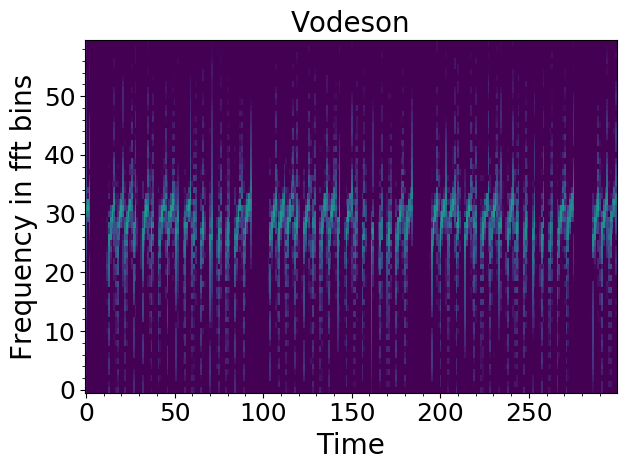

In [101]:
# db = np.fromfile(db, dtype="float32")
msps = 1
stft = gpu_test_file(vod,msps)
X_stft = stft[...,0] + stft[...,1] + stft[...,2] - stft[...,3]
stft_plot = 20*np.log10(np.abs(X_stft.detach().cpu().numpy()+eps))
fig1 = plt.figure()
plt.imshow(stft_plot[260:320,0:300], vmin=-70, vmax=5, aspect='auto', origin='lower')
# plt.imshow(stft_plot, vmin=-70, vmax=5, aspect='auto', origin='lower')
plt.title('Vodeson', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Frequency in fft bins', fontsize=20)
plt.minorticks_on()
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.tight_layout()
os.chdir(path_plots)
fig1.savefig('vod.pdf', format="pdf")
plt.show()

#### ysf

In [94]:
os.chdir(path_ysf)
ysf = np.fromfile("YSF4_1msps_test1.sigmf-data", dtype="float32")

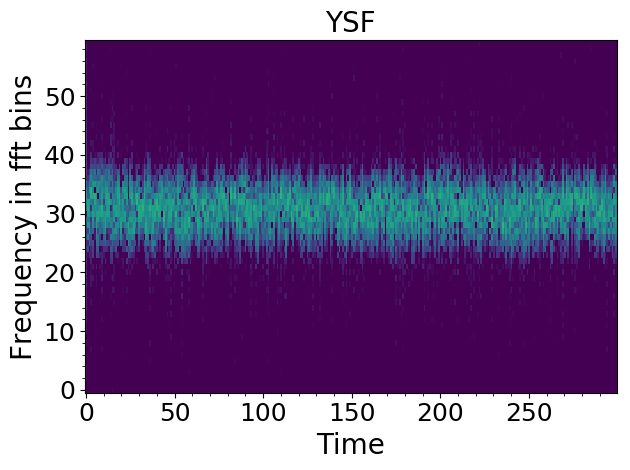

In [119]:
# db = np.fromfile(db, dtype="float32")
msps = 1
stft = gpu_test_file(ysf,msps)
X_stft = stft[...,0] + stft[...,1] + stft[...,2] - stft[...,3]
stft_plot = 20*np.log10(np.abs(X_stft.detach().cpu().numpy()+eps))
fig1 = plt.figure()
plt.imshow(stft_plot[380:440,0:300], vmin=-70, vmax=5, aspect='auto', origin='lower')
# plt.imshow(stft_plot, vmin=-70, vmax=5, aspect='auto', origin='lower')
plt.title('YSF', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Frequency in fft bins', fontsize=20)
plt.minorticks_on()
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.tight_layout()
os.chdir(path_plots)
fig1.savefig('ysf.pdf', format="pdf")
plt.show()

In [127]:
ysf_len = np.size(ysf)

In [128]:
ysf_len

20000000

In [129]:
per_time_fft = 10/ysf_len

In [130]:
per_time_fft

5e-07

In [131]:
unit_time = 300*per_time_fft

In [132]:
unit_time

0.00015

In [136]:
(1024/1e6)*100

0.10239999999999999

### Plots

In [26]:
resnet50_plot_1msps = [.91, .46, .44, .37]
resnet50_plot_25msps = [.36, .60, .45, .45]
resnet50_plot_mix = [1.00, 0.93, 0.96, .85]

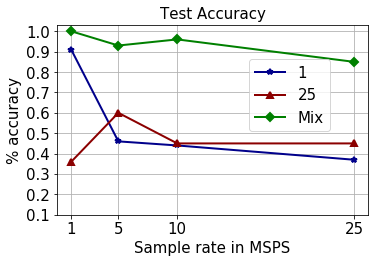

In [27]:
path_plot_fig = "/home/david/sigMF_ML/RF/RF_class/plot_data/" # ACE
os.chdir(path_plot_fig)
num = 4
x = [1, 5, 10, 25] # Start at index position 1
plt.rcParams.update({'font.size': 15})
# plt.figure(figsize=(9, 6))

fig2 = plt.figure()
# ax = plt.subplot(111)
# ax.set_xscale('log')
# Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.plot(x[0:num],resnet50_plot_1msps[0:num], '-*', c='darkblue',markersize=6, linewidth=2,markerfacecolor='darkblue',markeredgecolor='darkblue',markeredgewidth=2, label='1')
# plt.plot(x[1:num],resnet50_plot_5msps[1:num], '-X', c='blue', markersize=6, linewidth=2,markerfacecolor='blue',markeredgecolor='blue',markeredgewidth=2, label='5')
# plt.plot(x[1:num],resnet50_plot_10msps[1:num], '-D', c='red', markersize=6, linewidth=2,markerfacecolor='red',markeredgecolor='red',markeredgewidth=2, label='10')
plt.plot(x[0:num],resnet50_plot_25msps[0:num], '-^', c='darkred', markersize=6, linewidth=2,markerfacecolor='darkred',markeredgecolor='darkred',markeredgewidth=2, label='25')
plt.plot(x[0:num],resnet50_plot_mix[0:num], '-D', c='green', markersize=6, linewidth=2,markerfacecolor='green',markeredgecolor='green',markeredgewidth=2, label='Mix')
# plt.legend(loc='lower center', fontsize=15)
plt.legend(bbox_to_anchor = [0.9, 0.40], fontsize=15)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Test Accuracy', fontsize=15)
plt.xlabel('Sample rate in MSPS')
plt.ylabel('% accuracy')
plt.grid()
# plt.minorticks_on()
# plt.yticks(np.arange(.5,1, .1))
plt.yticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
plt.xticks([1, 5, 10, 25])

# plt.tight_layout()
# *************************************************
# axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.18)
plt.subplots_adjust(bottom=0.22)
# fig2.set_size_inches(6.0, 4.0)
# *************************************************
fig2.savefig('resnet50_overall_20220210.pdf', format="pdf")
# plt.show()

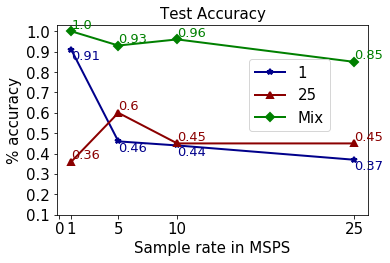

In [40]:
path_plot_fig = "/home/david/sigMF_ML/RF/RF_class/plot_data/" # ACE
os.chdir(path_plot_fig)
num = 4
x = [1, 5, 10, 25] # Start at index position 1
plt.rcParams.update({'font.size': 15})

fig2 = plt.figure()

plt.plot(x[0:num],resnet50_plot_1msps[0:num], '-*', c='darkblue',markersize=6, linewidth=2,markerfacecolor='darkblue',markeredgecolor='darkblue',markeredgewidth=2, label='1')
for a,b in zip(x, resnet50_plot_1msps): 
    plt.text(a, b, str(b), horizontalalignment='left', verticalalignment='top',fontsize=13,color='darkblue')  

plt.plot(x[0:num],resnet50_plot_25msps[0:num], '-^', c='darkred', markersize=6, linewidth=2,markerfacecolor='darkred',markeredgecolor='darkred',markeredgewidth=2, label='25')
for a,b in zip(x, resnet50_plot_25msps): 
    plt.text(a, b, str(b), horizontalalignment='left', verticalalignment='bottom',fontsize=13,color='darkred') 


plt.plot(x[0:num],resnet50_plot_mix[0:num], '-D', c='green', markersize=6, linewidth=2,markerfacecolor='green',markeredgecolor='green',markeredgewidth=2, label='Mix')
for a,b in zip(x, resnet50_plot_mix): 
    plt.text(a, b, str(b), horizontalalignment='left', verticalalignment='bottom',fontsize=13,color='green') 

# plt.legend(loc='lower center', fontsize=15)
plt.legend(bbox_to_anchor = [0.9, 0.40], fontsize=15)
plt.title('Test Accuracy', fontsize=15)
plt.xlabel('Sample rate in MSPS')
plt.ylabel('% accuracy')
# plt.grid()
plt.yticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
plt.xticks([0,1, 5, 10, 25])
plt.subplots_adjust(left=0.18)
plt.subplots_adjust(bottom=0.22)
fig2.savefig('resnet50_overall_20220210_labeled.pdf', format="pdf")

In [41]:
patch2 = [.98, 1.0, .87, .98]
patch3 = [.91, .94, .80, .96]

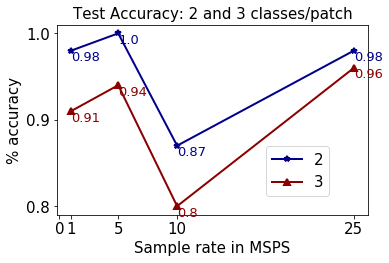

In [47]:
path_plot_fig = "/home/david/sigMF_ML/RF/RF_class/plot_data/" # ACE
os.chdir(path_plot_fig)
num = 4
x = [1, 5, 10, 25] # Start at index position 1
plt.rcParams.update({'font.size': 15})

fig2 = plt.figure()

plt.plot(x[0:num],patch2[0:num], '-*', c='darkblue',markersize=6, linewidth=2,markerfacecolor='darkblue',markeredgecolor='darkblue',markeredgewidth=2, label='2')
for a,b in zip(x, patch2): 
    plt.text(a, b, str(b), horizontalalignment='left', verticalalignment='top',fontsize=13,color='darkblue')  

plt.plot(x[0:num],patch3[0:num], '-^', c='darkred', markersize=6, linewidth=2,markerfacecolor='darkred',markeredgecolor='darkred',markeredgewidth=2, label='3')
for a,b in zip(x, patch3): 
    plt.text(a, b, str(b), horizontalalignment='left', verticalalignment='top',fontsize=13,color='darkred') 

# plt.legend(loc='lower center', fontsize=15)
plt.legend(bbox_to_anchor = [0.9, 0.40], fontsize=15)
plt.title('Test Accuracy: 2 and 3 classes/patch', fontsize=15)
plt.xlabel('Sample rate in MSPS')
plt.ylabel('% accuracy')
# plt.grid()
# plt.yticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
plt.yticks([.8, .9, 1.0])
plt.xticks([0,1, 5, 10, 25])
plt.subplots_adjust(left=0.18)
plt.subplots_adjust(bottom=0.22)
fig2.savefig('resnet50_2and3_patches_20220210.pdf', format="pdf")

### classes per plot as threshold changes

In [9]:
patch_1_2classes = [.9333, .9111, .9111, .8889, .8667]
patch_5_2classes = [.9778, .8667, .8444, .7556, .7333]
patch_10_2classes = [.9556, .9111, .8444, .7778, .7556]
patch_25_2classes = [.8000, .7778, .7778, .7556, .7111]

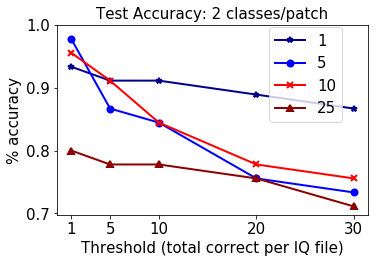

In [62]:
path_plot_fig = "/home/david/sigMF_ML/RF/RF_class/plot_data/" # ACE
os.chdir(path_plot_fig)
num = 5
x = [1, 5, 10, 20, 30] # Start at index position 1
plt.rcParams.update({'font.size': 15})

fig2 = plt.figure()

plt.plot(x[0:num],patch_1_2classes[0:num], '-*', c='darkblue',markersize=6, linewidth=2,markerfacecolor='darkblue',markeredgecolor='darkblue',markeredgewidth=2, label='1')
# for a,b in zip(x, patch_1_2classes): 
#     plt.text(a, b, str(b), horizontalalignment='left', verticalalignment='top',fontsize=13,color='darkblue') 
    
plt.plot(x[0:num],patch_5_2classes[0:num], '-o', c='blue',markersize=6, linewidth=2,markerfacecolor='blue',markeredgecolor='blue',markeredgewidth=2, label='5')
# for a,b in zip(x, patch_5_2classes): 
#     plt.text(a, b, str(b), horizontalalignment='left', verticalalignment='top',fontsize=13,color='blue') 

plt.plot(x[0:num],patch_10_2classes[0:num], '-x', c='red', markersize=6, linewidth=2,markerfacecolor='red',markeredgecolor='red',markeredgewidth=2, label='10')
# for a,b in zip(x, patch_10_2classes): 
#     plt.text(a, b, str(b), horizontalalignment='left', verticalalignment='top',fontsize=13,color='red')    

plt.plot(x[0:num],patch_25_2classes[0:num], '-^', c='darkred', markersize=6, linewidth=2,markerfacecolor='darkred',markeredgecolor='darkred',markeredgewidth=2, label='25')
# for a,b in zip(x, patch_25_2classes): 
#     plt.text(a, b, str(b), horizontalalignment='left', verticalalignment='top',fontsize=13,color='darkred') 


plt.legend(bbox_to_anchor = [0.8, 0.45], fontsize=15)

plt.title('Test Accuracy: 2 classes/patch', fontsize=15)
plt.xlabel('Threshold (total correct per IQ file)')
plt.ylabel('% accuracy')
# plt.grid()
# plt.yticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
# plt.yticks([.3, .4, .5, .6, .7, .8, .9, 1.0])
plt.yticks([.7, .8, .9, 1.0])
plt.xticks([1, 5, 10, 20, 30])

plt.subplots_adjust(left=0.18)
plt.subplots_adjust(bottom=0.22)
fig2.savefig('resnet50_2_patches_20220325.png', format="png")

In [32]:
patch_1_3classes = [.7333, .6750, .6167, .5417, .5250]
patch_5_3classes = [.6500, .5417, .5417, .5333, .5333]
patch_10_3classes = [.7750, .7167, .6750, .6667, .6667]
patch_25_3classes = [.6500, .5917, .5917, .4500, .3583]

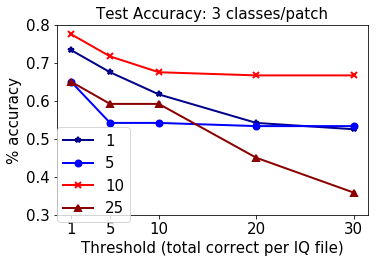

In [61]:
path_plot_fig = "/home/david/sigMF_ML/RF/RF_class/plot_data/" # ACE
os.chdir(path_plot_fig)
num = 5
x = [1, 5, 10, 20, 30] # Start at index position 1
plt.rcParams.update({'font.size': 15})

fig2 = plt.figure()

plt.plot(x[0:num],patch_1_3classes[0:num], '-*', c='darkblue',markersize=6, linewidth=2,markerfacecolor='darkblue',markeredgecolor='darkblue',markeredgewidth=2, label='1')
# for a,b in zip(x, patch_1_3classes): 
#     plt.text(a, b, str(b), horizontalalignment='left', verticalalignment='top',fontsize=13,color='darkblue') 
    
plt.plot(x[0:num],patch_5_3classes[0:num], '-o', c='blue',markersize=6, linewidth=2,markerfacecolor='blue',markeredgecolor='blue',markeredgewidth=2, label='5')
# for a,b in zip(x, patch_5_3classes): 
#     plt.text(a, b, str(b), horizontalalignment='left', verticalalignment='top',fontsize=13,color='blue') 

plt.plot(x[0:num],patch_10_3classes[0:num], '-x', c='red', markersize=6, linewidth=2,markerfacecolor='red',markeredgecolor='red',markeredgewidth=2, label='10')
# for a,b in zip(x, patch_10_3classes): 
#     plt.text(a, b, str(b), horizontalalignment='left', verticalalignment='top',fontsize=13,color='red')    

plt.plot(x[0:num],patch_25_3classes[0:num], '-^', c='darkred', markersize=6, linewidth=2,markerfacecolor='darkred',markeredgecolor='darkred',markeredgewidth=2, label='25')
# for a,b in zip(x, patch_25_3classes): 
#     plt.text(a, b, str(b), horizontalalignment='left', verticalalignment='top',fontsize=13,color='darkred') 


plt.legend(bbox_to_anchor = [0.26, 0.50], fontsize=15)

plt.title('Test Accuracy: 3 classes/patch', fontsize=15)
plt.xlabel('Threshold (total correct per IQ file)')
plt.ylabel('% accuracy')
# plt.grid()
# plt.yticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
# plt.yticks([.3, .4, .5, .6, .7, .8, .9, 1.0])
plt.yticks([.3, .4, .5, .6, .7, .8])
plt.xticks([1, 5, 10, 20, 30])

plt.subplots_adjust(left=0.18)
plt.subplots_adjust(bottom=0.22)
fig2.savefig('resnet50_3_patches_20220325.png', format="png")

In [ ]:
# for a,b in zip(x, resnet50_plot_1msps): 
#     plt.text(a, b, str(b))  

In [ ]:
x = [433.1, 433.2,433.3,433.4,433.5,433.6]

In [ ]:
y = []

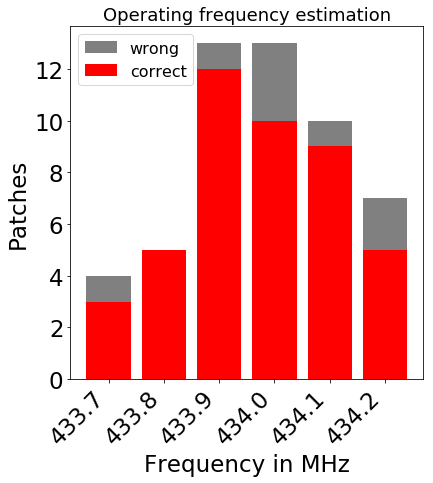

In [95]:
# Data set
wrong = [1, 0, 1, 3, 1, 2]
correct = [3, 5, 12, 10, 9, 5]
bars = ('433.7', '433.8', '433.9', '434.0', '434.1', '434.2')
y_pos = np.arange(len(bars))
fig1 = plt.figure()
ax = fig1.add_axes([0.20, 0.25, .7, .7])
width = 0.8
# plt.bar(y_pos, height, color='blue',width = 0.4, label='Matches')
ax.bar(bars, wrong, width, bottom=correct, color='grey', label='wrong')
ax.bar(bars, correct, width, color='red', label='correct')
# use the plt.xticks function to custom labels
plt.xticks(y_pos, bars, color='black', rotation=45, fontweight='normal', fontsize='23', horizontalalignment='right')
plt.rcParams.update({'font.size': 23})
# plt.legend(bbox_to_anchor = [0.26, 0.50], fontsize=23)
plt.legend(loc='upper left', fontsize=16)
plt.title('Operating frequency estimation', fontsize=18)
plt.xlabel('Frequency in MHz', fontsize=23)
plt.ylabel('Patches', fontsize=23)
# axes=plt.gca()
# plt.subplots_adjust(left=0.3)
# plt.subplots_adjust(bottom=0.40)
fig1.set_size_inches(7.0, 7.0)
fig1.savefig('op_freq_histogram.pdf', format="pdf")